In [1]:
'''All packages'''

import geopandas as gpd
import pandas as pd
from shapely import geometry
from shapely.geometry import Polygon, LineString, Point
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt, mpld3
from mpld3 import fig_to_html, plugins

%matplotlib inline

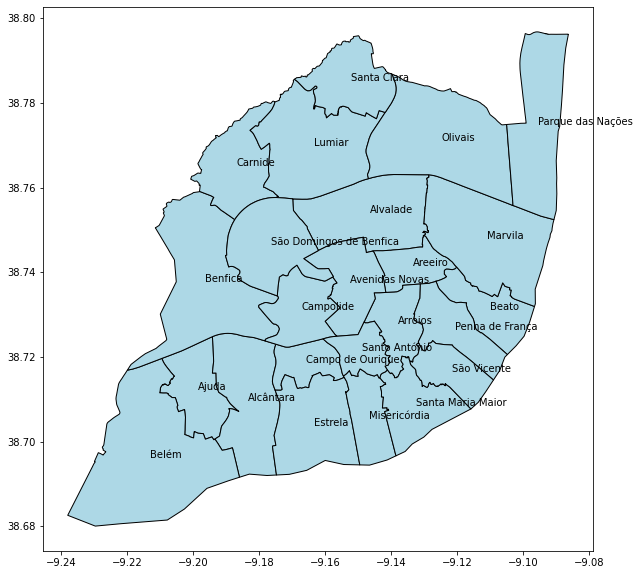

In [2]:
'''Simple Plot of Map Without Filter and Choropleth'''

plt.rcParams['figure.figsize'] = (20, 10) #setting parameters
df_places = gpd.read_file('./Lisboa.geojson') #read file Lisboa.geojson


fig,ax=plt.subplots(1,1)
axis = df_places.plot(ax=ax,color="lightblue", edgecolor='black') #plot of map Lisboa.geojson

#for to put the name of the regions
for idx, row in df_places.iterrows():
    coord = row['geometry'].centroid
    coordinates = coord.coords.xy
    x, y = coordinates[0][0], coordinates[1][0]
    axis.annotate(row['NOME'], xy=(x, y), xytext=(x, y)) 

html_str = mpld3.fig_to_html(fig)
Html_file= open("index.html","w")
Html_file.write(html_str)
Html_file.close()

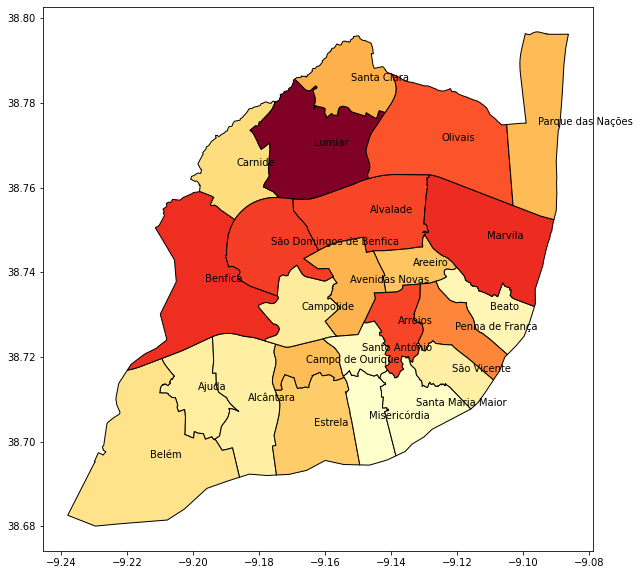

In [3]:
'''Plot of Map with Choropleth of Population'''


population = []

#appending all elements of geojson to convert to integer 
for idx, row in df_places.iterrows():
    population.append(row['Censos 2021 População Lisboa_POPULACAO RESIDENTE'])
    
#converting to integers
for a in range(0, len(population)):
    population[a] = int(population[a])


df_places["Censos 2021 População Lisboa_POPULACAO RESIDENTE"] = population
    
fig,ax=plt.subplots(1,1)
axis = df_places.plot(ax=ax, column = "Censos 2021 População Lisboa_POPULACAO RESIDENTE", 
                      edgecolor = "black",
                      cmap='YlOrRd')


for idx, row in df_places.iterrows():
    #print(row['geometry'].exterior.coords[1])
    coord = row['geometry'].centroid
    coordinates = coord.coords.xy

    #print(row['geometry'].centroid.wkt.replace('POINT ',''))
    x, y = coordinates[0][0], coordinates[1][0]
    #axis.scatter(x, y, s=10, color='red')
    axis.annotate(row['NOME'], xy=(x, y), xytext=(x, y))  

html_str = mpld3.fig_to_html(fig)
Html_file= open("index.html","w")
Html_file.write(html_str)
Html_file.close()

In [4]:
#main variables 

directory = "./archives"
ext = ".geojson"

#variable that contains all the searched filters
lista=[]

listadirs=[]
dic={}
filtrolist=[]

In [5]:
#function to search

def leitura(filtro = "normal"):
    i=0
    sum=0
    global lista, listadirs, dic, filtrolist
    listafiles=[]


    for root, dirs, files in os.walk(directory):
        
        if len(dirs) > 0:
            listadirs = dirs

        if len(files) > 0:
            for value in files:
                listafiles.append(root.replace("/", "\\")+"\\"+value.replace("/","\\"))

            dic[listadirs[i]] = listafiles
            listafiles = []
            i+=1    
        
        for file in files:
            if file.endswith(ext):
                if filtro is not None:
                    if filtro.find(file.replace(".geojson","")) != -1 and len(file) == len(filtro):
                        print(filtro)
                        ficheiro = os.path.join(root, file)
                        lista.append(gpd.read_file(ficheiro))
                        

    
    for k, v in dic.items():
        for value in v:
            if value.find(filtro) != -1:
                filtrolist.append(k)

def pprint():
    for k,v in dic.items():
        print(k+":")
        for value in v:
            print("       "+ value)
            
leitura()   
pprint()

ambiente:
       .\archives\ambiente\Amb_EcopontosSubterraneos.geojson
       .\archives\ambiente\Amb_Limpeza.geojson
       .\archives\ambiente\Ecopontos.geojson
       .\archives\ambiente\Jardins-Parques-urbanos.geojson
       .\archives\ambiente\Reciclagem.geojson
culturalazer:
       .\archives\culturalazer\Desporto_Instalacoes.geojson
       .\archives\culturalazer\Museus, bibliotecas e arquivos.geojson
economia:
       .\archives\economia\Centros Comerciais.geojson
       .\archives\economia\Feiras.geojson
       .\archives\economia\Mercados.geojson
educacao:
       .\archives\educacao\Escola Secundaria.geojson
       .\archives\educacao\escolas 1 ciclo.geojson
       .\archives\educacao\Escolas 1_Ciclo.geojson
saude:
       .\archives\saude\Farmacias.geojson
       .\archives\saude\Hospitais Publicos.geojson
seguranca:
       .\archives\seguranca\Administracao_Publica.geojson
transportes:
       .\archives\transportes\Estacoes Comboio.geojson
       .\archives\transportes\Estaco

Farmacias.geojson
Hospitais Publicos.geojson


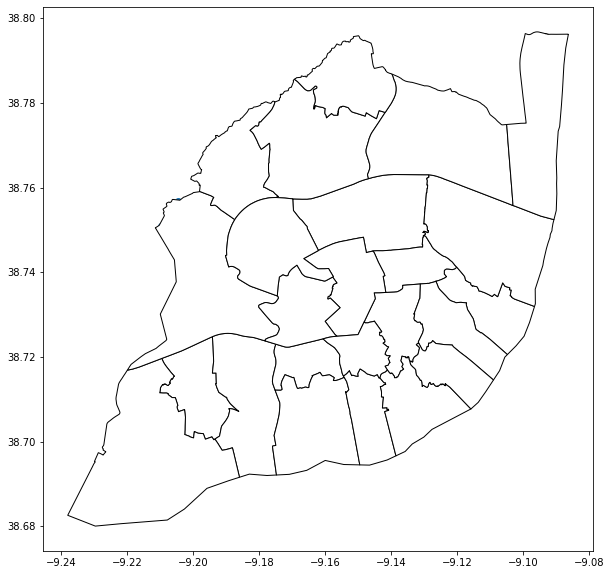

In [6]:
#code with the objective os input severals directory
b=True
c=0


while b:
    
    a = input("Insira os diretorios: ")
    leitura(a)
    if a == "sair":
        b=False




fig, ax=plt.subplots()
for a in lista:
    a.plot(ax=ax, zorder=c)
    c+=1

df_places.plot(ax=ax, color = "white", edgecolor="black")


html_str = mpld3.fig_to_html(fig)
Html_file= open("index.html","w")
Html_file.write(html_str)
Html_file.close()

In [7]:
print(filtrolist)

['saude', 'saude']


In [14]:
'''Choropleth with Points of Filter'''

geopoints = []
geopointsfiltered = []
count = []
total = []


#organizing the names
df_places.NOME=sorted(df_places.NOME)
print(df_places.NOME)


# main loop for processing filtered elements
for b in range(0, len(lista)):
    # Loop for appending geometry per each filter
    for idx, row in lista[b].iterrows():
        geopoints.append(row.geometry)

    # for each non empty element inside geopoints save it to list geopointsfiltered    
    for ele in geopoints:
        if ele != None:
            geopointsfiltered.append(ele)
            
    #Nested FOR loop to analize the intersection of points with regions 
    # in this for loop we check each filter
    for a in geopointsfiltered:
        # in this for loop we check each region
        for idx1, row1 in df_places.iterrows():
                # if the point is inside of the geometry that defines the region then we append to the list count 
                if a.intersects(row1.geometry) == True:
                    count.append(row1.NOME)


    #for loop to analize the number of times that points appear in each region to later append them to a "total".
    for a in df_places.NOME:
        numb = count.count(a)
        total.append(numb) 
 
    #Convert to float       
    for a in range(0, len(total)):
        total[a] = float(total[a])

    
    filtrolist[b] = total
    
  
    # Reset lists to later be used by other filters 
    geopoints = []
    geopointsfiltered= []
    count = []
    total = []

#USELESS (need to find out what the fuck this is doing)
wtf = 0 
for a in filtrolist[0]:
    wtf += a

print(wtf)
wtf=0

for a in filtrolist[1]:
    wtf += a
print(wtf)
print(filtrolist[0])
print(filtrolist[1])




0                       Ajuda
1                   Alcântara
2                    Alvalade
3                     Areeiro
4                     Arroios
5              Avenidas Novas
6                       Beato
7                       Belém
8                     Benfica
9            Campo de Ourique
10                  Campolide
11                    Carnide
12                    Estrela
13                     Lumiar
14                    Marvila
15               Misericórdia
16                    Olivais
17          Parque das Nações
18            Penha de França
19                Santa Clara
20          Santa Maria Maior
21              Santo António
22    São Domingos de Benfica
23                São Vicente
Name: NOME, dtype: object
36.0
12.0
[0.0, 0.0, 2.0, 1.0, 0.0, 2.0, 0.0, 4.0, 0.0, 3.0, 2.0, 2.0, 4.0, 3.0, 0.0, 2.0, 1.0, 0.0, 1.0, 0.0, 8.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0]


In [1]:
# variable with unknown uses
sum=0
#organizing the names of Lisboa 
df_places.NOME=sorted(df_places.NOME)

#soma todos os pontos e dps divide pela quantidade total 
for a in range(0, len(filtrolist)):
    for b in range(0, len(filtrolist[a])):
        # add individual count of each point to later get the a total value of all points, ex : filters happen 50 + 30 + 20 times
        sum+=filtrolist[a][b]
    for b in range(0, len(filtrolist[a])): 
        # divide each point by the total of points 
        filtrolist[a][b] = filtrolist[a][b] / sum

    # reset sum for next filter
    sum=0 

choropleth=[]
#soma dos pontos das mesmas regioes 
for a in range(0, len(filtrolist[0])):
    # flatten array
    for b in range(0, len(filtrolist)):
        sum += filtrolist[b][a]
    
    #print(sum)
    choropleth.append(sum)
    sum=0

print(choropleth)  

# add to variable inside geojson
df_places["Censos 2021 População Lisboa_field_4"] = choropleth


fig, ax=plt.subplots()
for a in lista:
    c+=1
    a.plot(ax=ax, zorder=c)

# print map
axis = df_places.plot(ax=ax, edgecolor = "black", column = "Censos 2021 População Lisboa_field_4", cmap= "YlOrRd", zorder=1)

for idx, row in df_places.iterrows():
    coord = row['geometry'].centroid
    coordinates = coord.coords.xy

    x, y = coordinates[0][0], coordinates[1][0]
    axis.annotate(row['NOME'], xy=(x, y), xytext=(x, y), font ="Tahoma")  

#print(filtrolist)
html_str = mpld3.fig_to_html(fig)
Html_file= open("index.html","w")
Html_file.write(html_str)
Html_file.close()

NameError: name 'df_places' is not defined